In [1]:
import pandas as pd
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
from notebookutils import root_dir, corr_plot; root_dir()

now in dir:  /Users/jonas/Documents/bayesianfactormodel


In [3]:
from model.utils import read_party_keys, party_name_from_key
from model.distributionplotter import DistributionPlotter
from model.traceplotter import TracePlotter
from model.parameterframe import ParameterFrame
from model.parameters import Parameters
from model.plotter import Plotter

In [4]:
beta_trace = pd.read_hdf('data//probit_v2_estimation_beta_trace_df.hdf')
factor_trace = pd.read_hdf('data//probit_v2_estimation_factor_trace_df.hdf')
#ystar_trace = pd.read_pickle('data//probit_v2_ystar_trace_df.pkl')
tau_trace = pd.read_hdf('data//probit_v2_tau_trace_df.hdf')

In [5]:
labels = read_party_keys()

In [6]:
order = ['q2', 'q8', 'q0', 'q1', 'q3', 'q4','q5','q6','q7','q9', 'q10', 'q11', 'q12', 'q13', 'q14']

In [7]:
# setting right style for plots
plt.rcdefaults()

### Tau

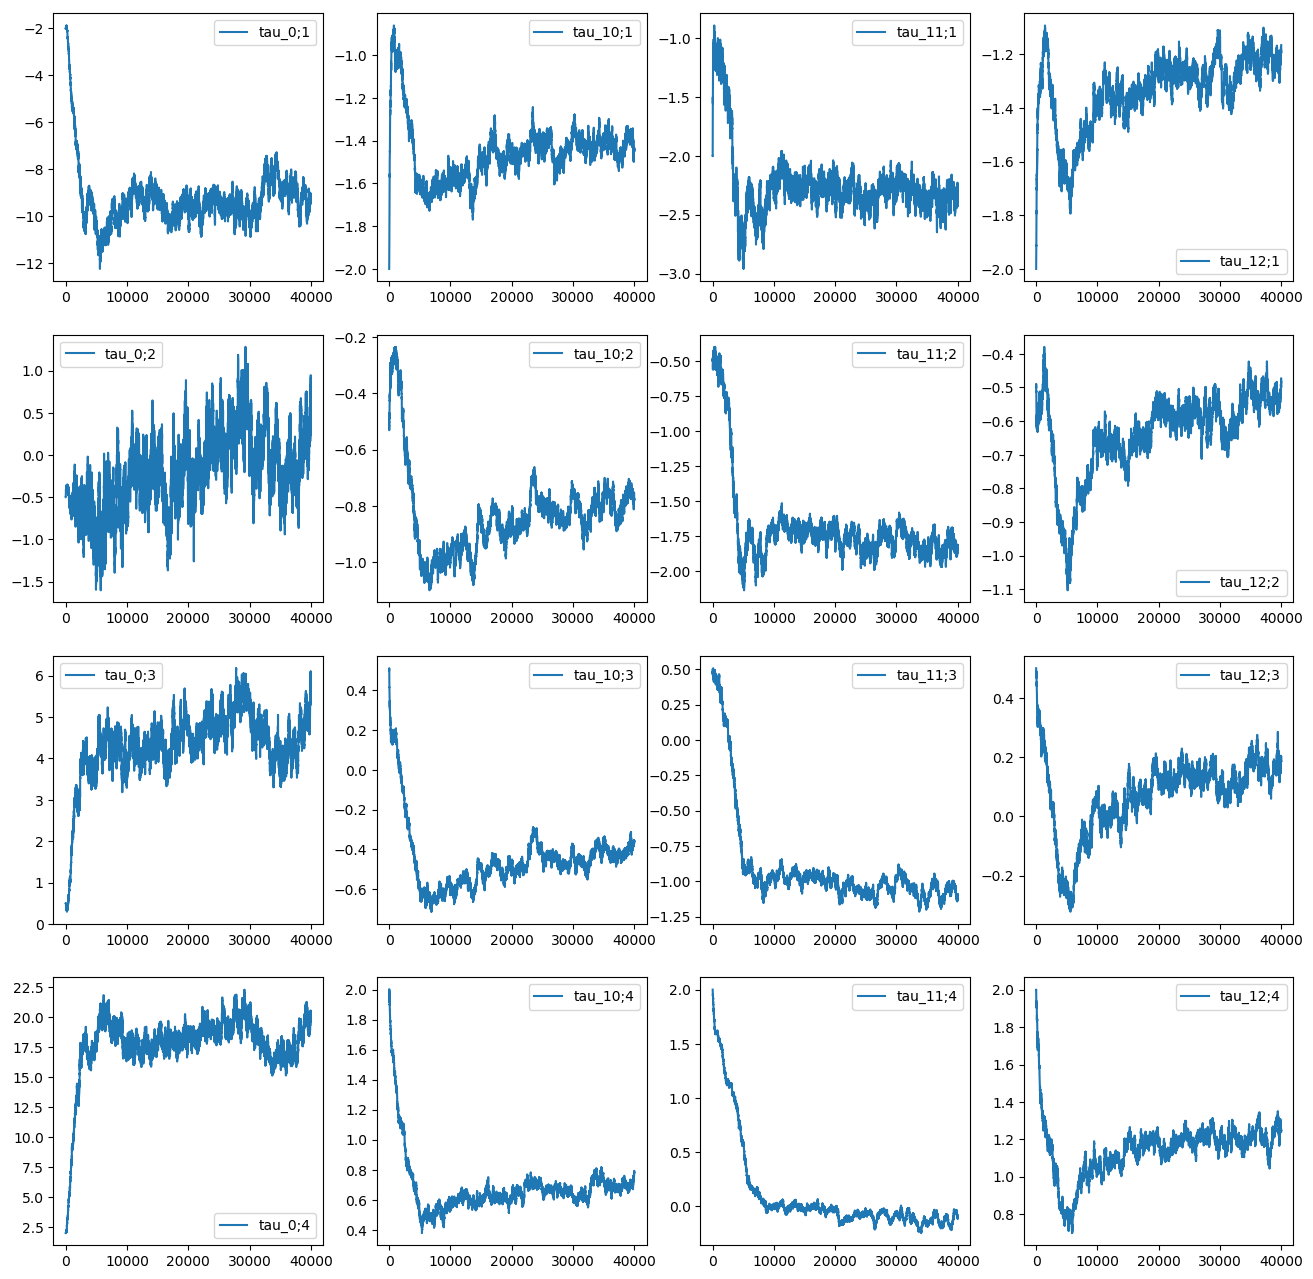

In [8]:
tp = TracePlotter(tau_trace)
f = tp.plot_4x4_traces()
f.savefig('figs_probit//probit_tau_trace_plot.png')
f

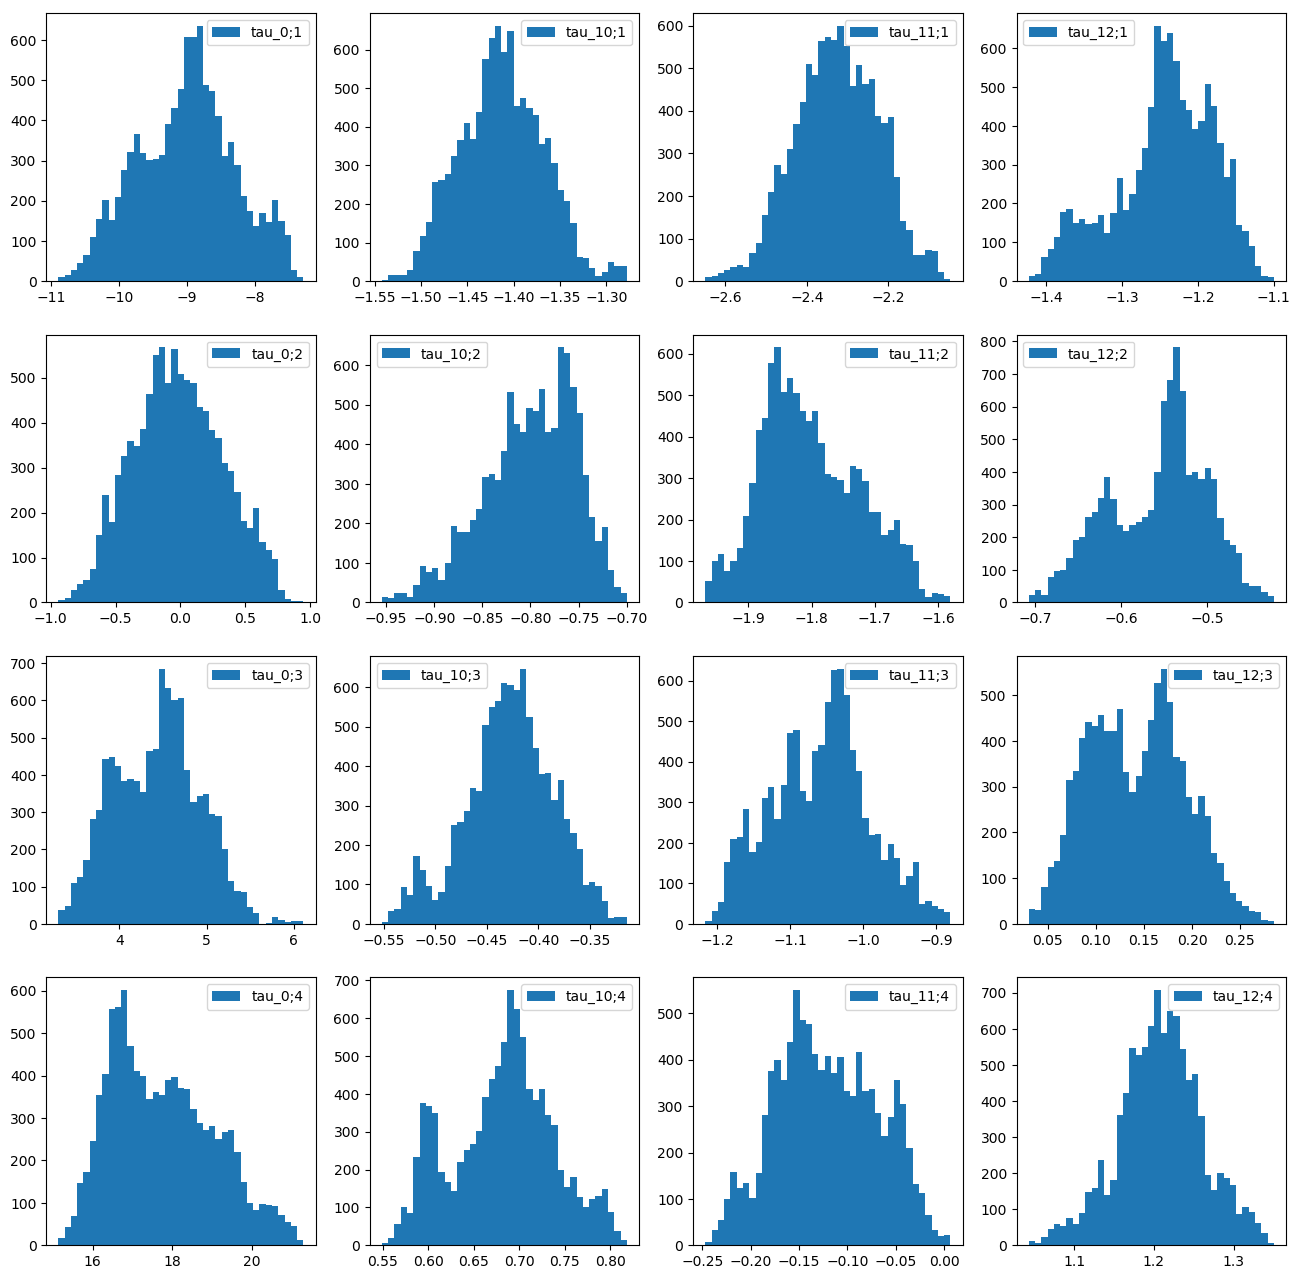

In [28]:
dp = DistributionPlotter(tau_trace, 0)
f = dp.plot_4x4_hists(skip_obs=30000)
f.savefig('figs_probit//probit_tau_dist_plot.png')
f

### Beta

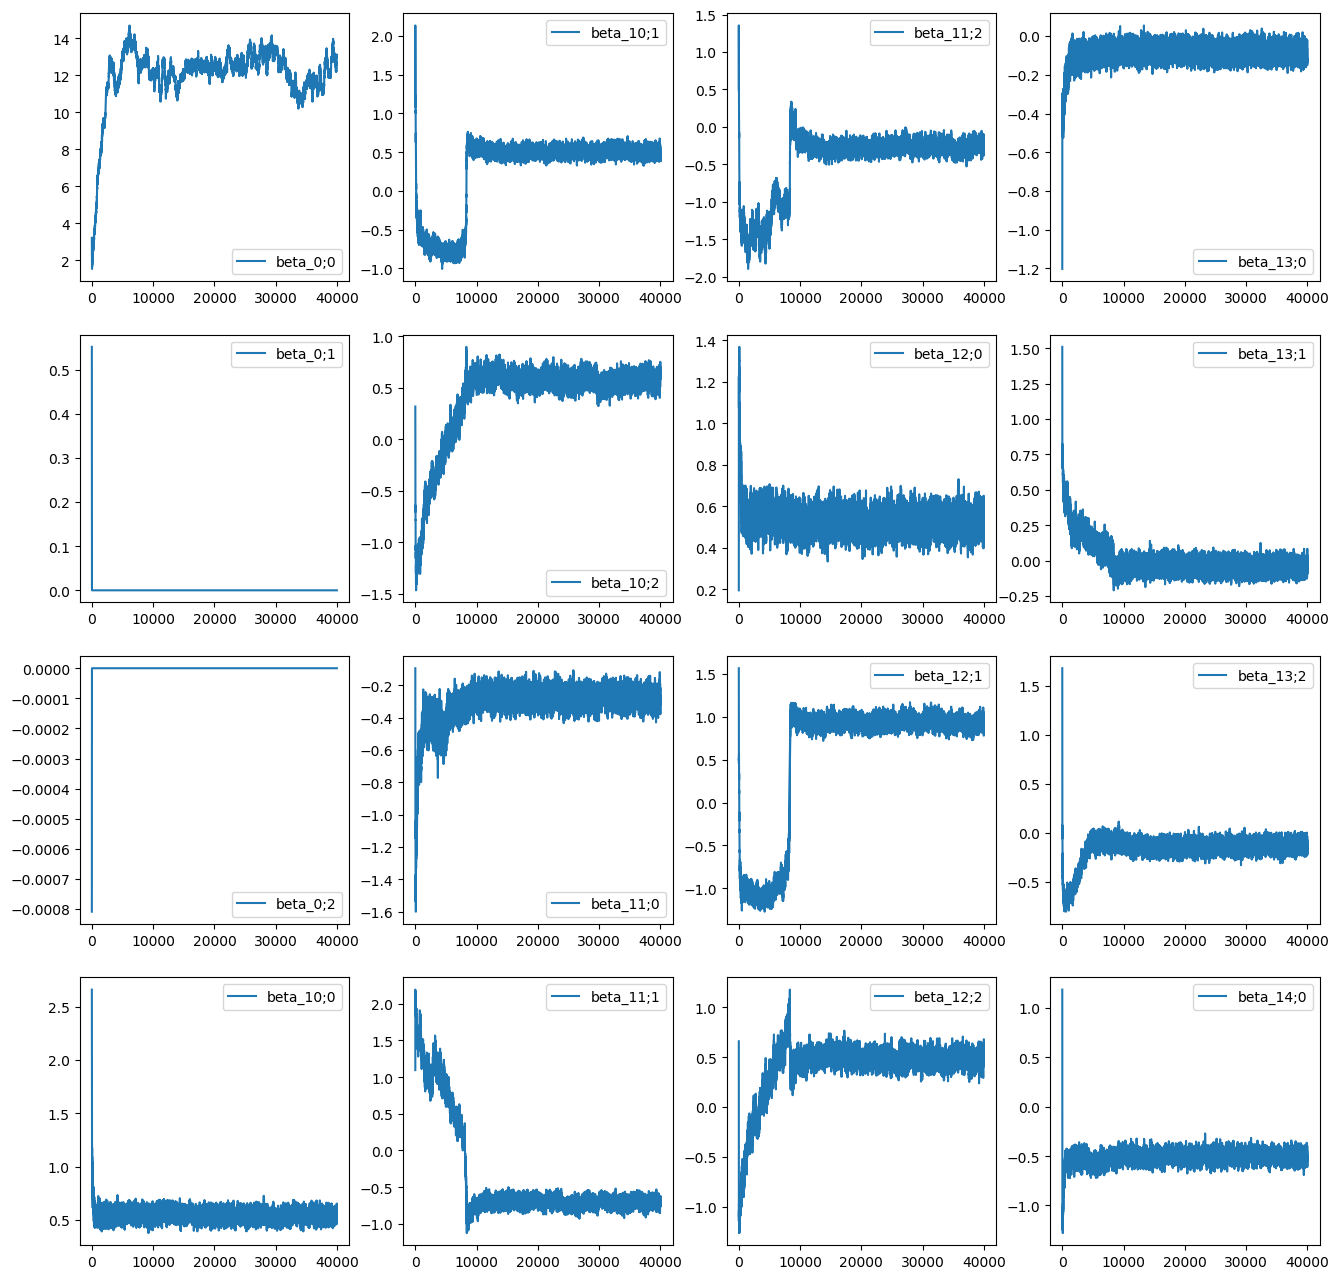

In [10]:
tp = TracePlotter(beta_trace)
f = tp.plot_4x4_traces()
f.savefig('figs_probit//probit_beta_trace_plot.png')
f

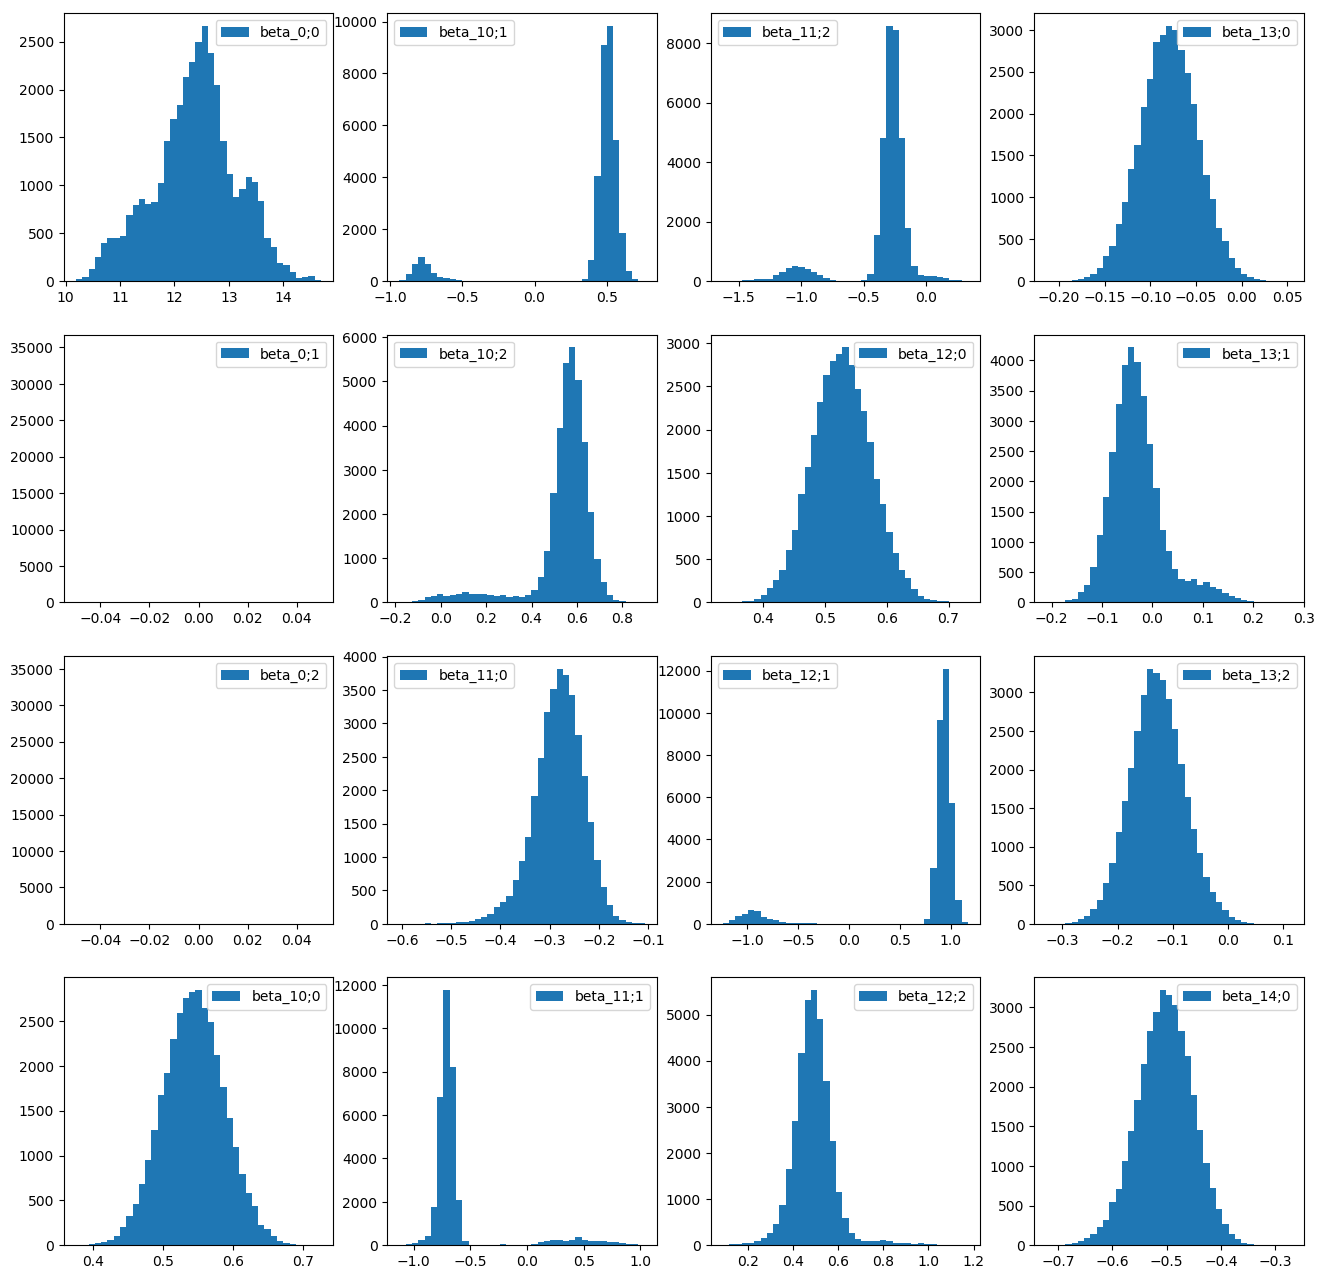

In [11]:
dp = DistributionPlotter(beta_trace, 0)
f = dp.plot_4x4_hists(skip_obs=5000)
f.savefig('figs_probit//probit_beta_dist_plot.png')
f

### Y*

In [12]:
"""tp = TracePlotter(ystar_trace)
f = tp.plot_4x4_traces()
f.savefig('figs_probit//probit_ystar_trace_plot.png')
f"""

"tp = TracePlotter(ystar_trace)\nf = tp.plot_4x4_traces()\nf.savefig('figs_probit//probit_ystar_trace_plot.png')\nf"

In [13]:
"""dp = DistributionPlotter(ystar_trace, 0)
f = dp.plot_4x4_hists(2000)
f.savefig('figs_probit//probit_ystar_dist_plot.png')
f"""

"dp = DistributionPlotter(ystar_trace, 0)\nf = dp.plot_4x4_hists(2000)\nf.savefig('figs_probit//probit_ystar_dist_plot.png')\nf"

### factors

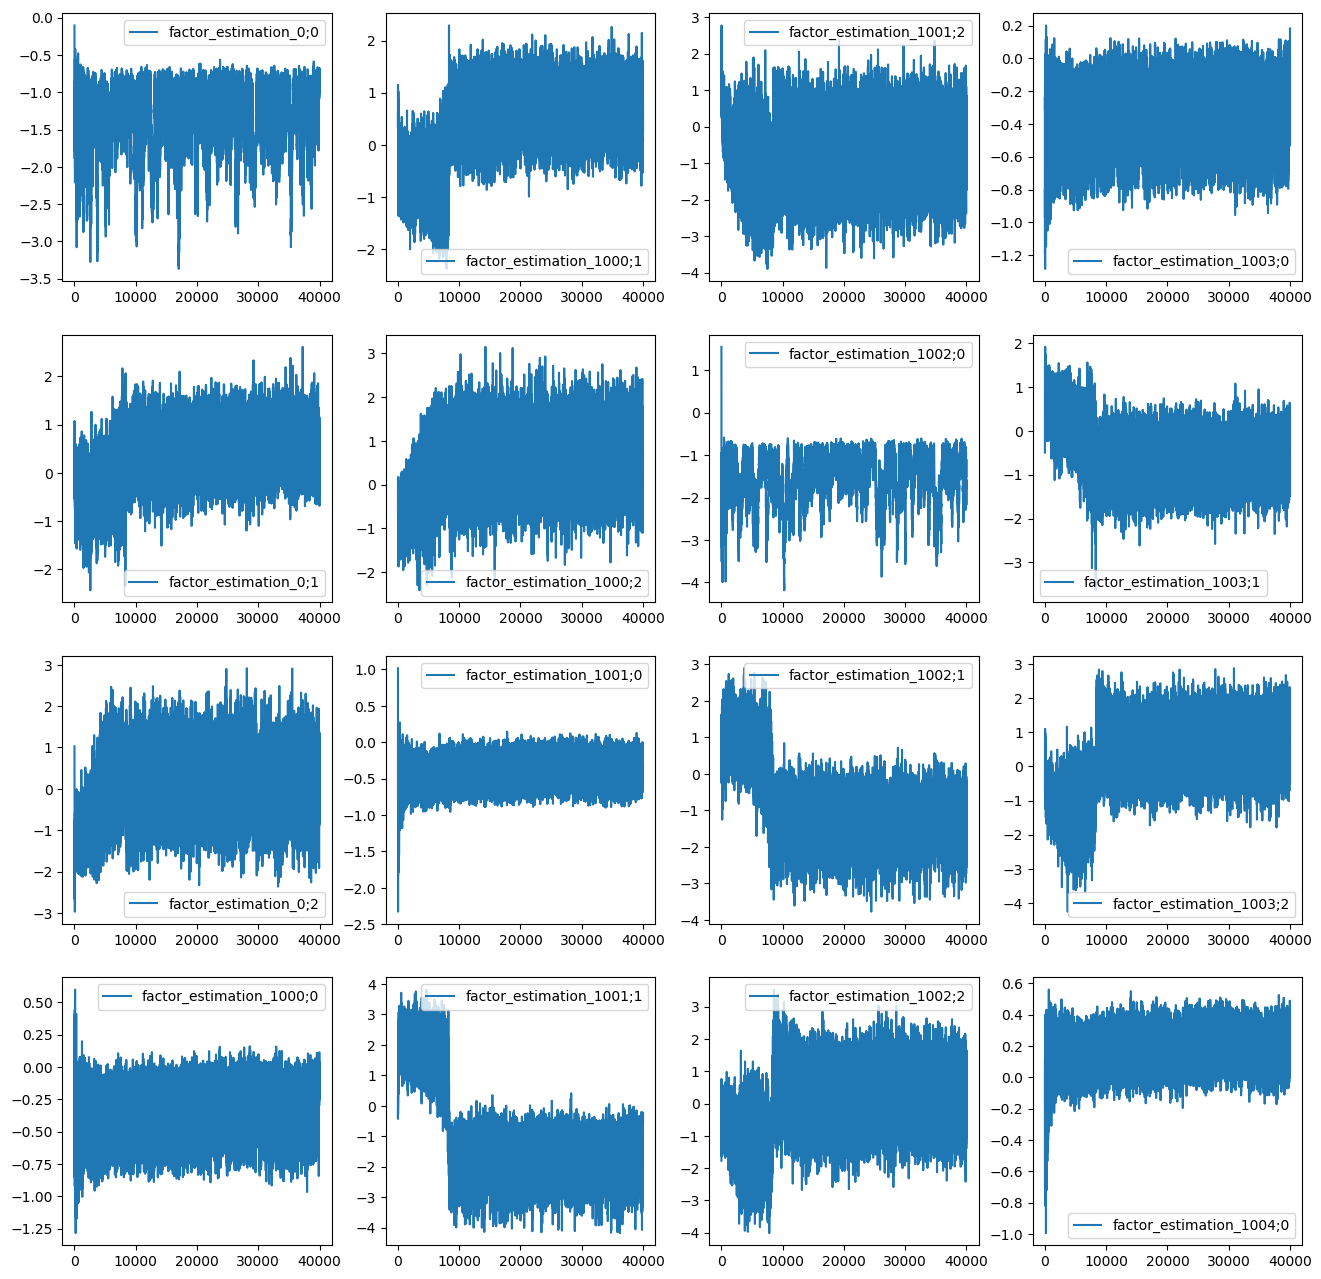

In [14]:
tp = TracePlotter(factor_trace)
f = tp.plot_4x4_traces()
f.savefig('figs_probit//probit_factor_trace_plot.png')
f

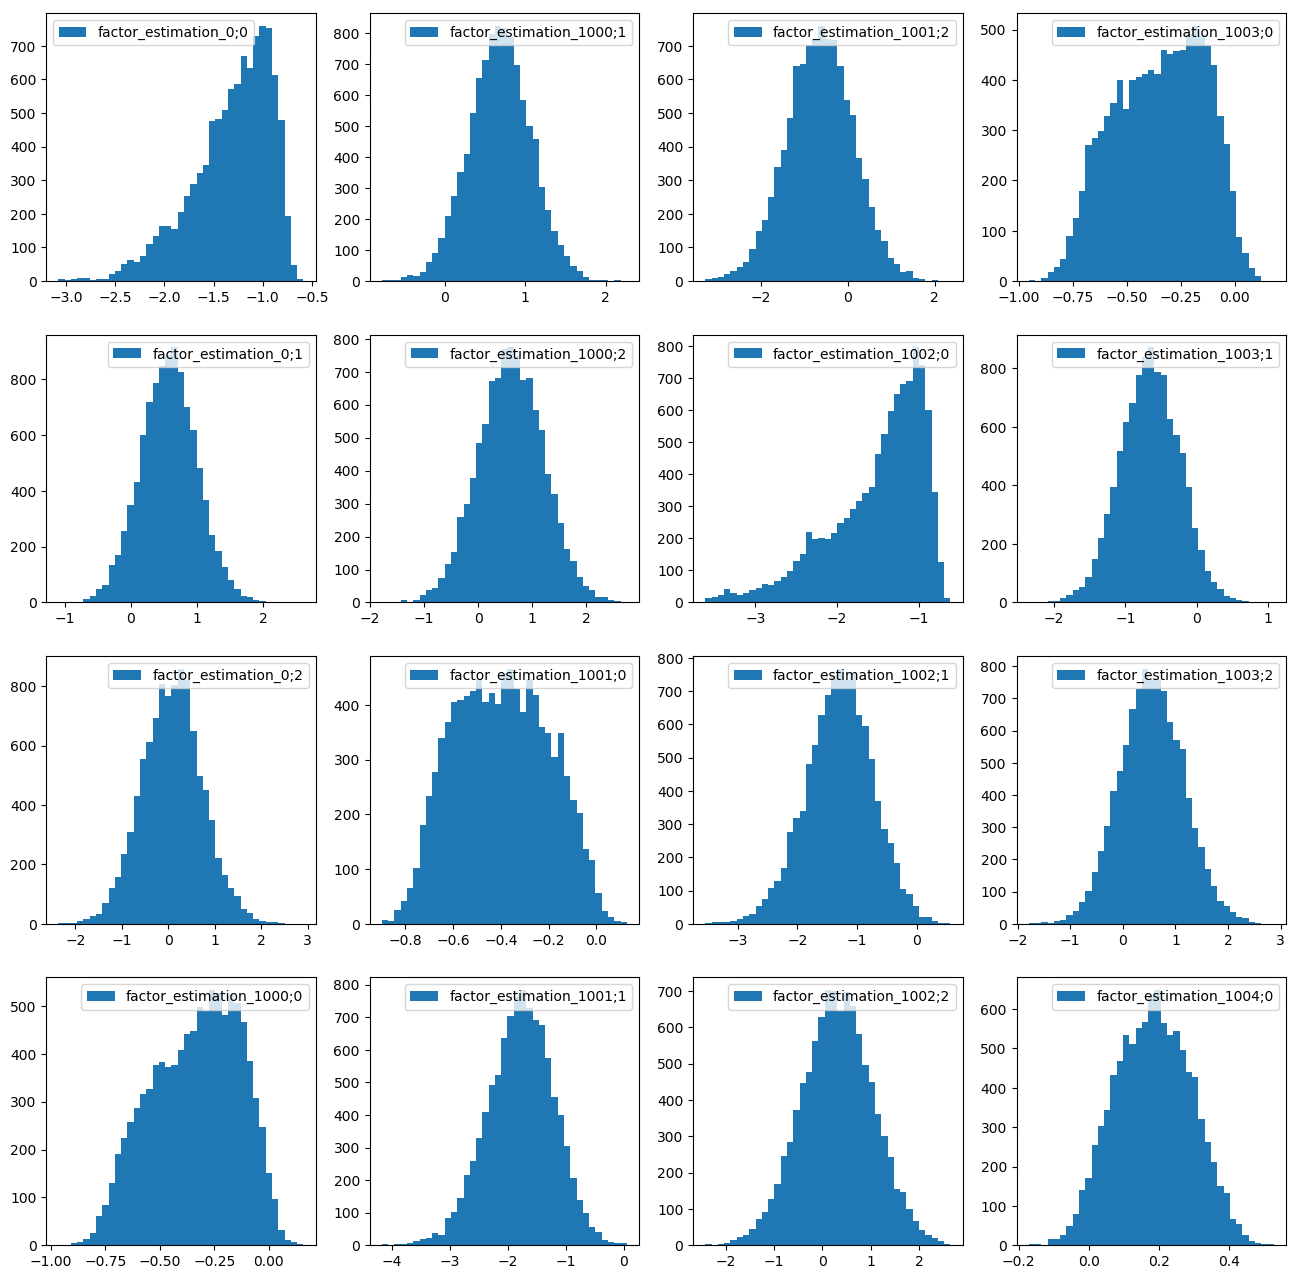

In [30]:
dp = DistributionPlotter(factor_trace, 0)
f = dp.plot_4x4_hists(skip_obs=30000)
f.savefig('figs_probit//probit_factor_dist_plot.png')
f

### Scatter plot of factors

In [31]:
F = Parameters(factor_trace)
F._calc_param_mean_dict(30000)
factors = F.params_to_df()

In [32]:
factors['party_names'] = [party_name_from_key(label) for label in labels]

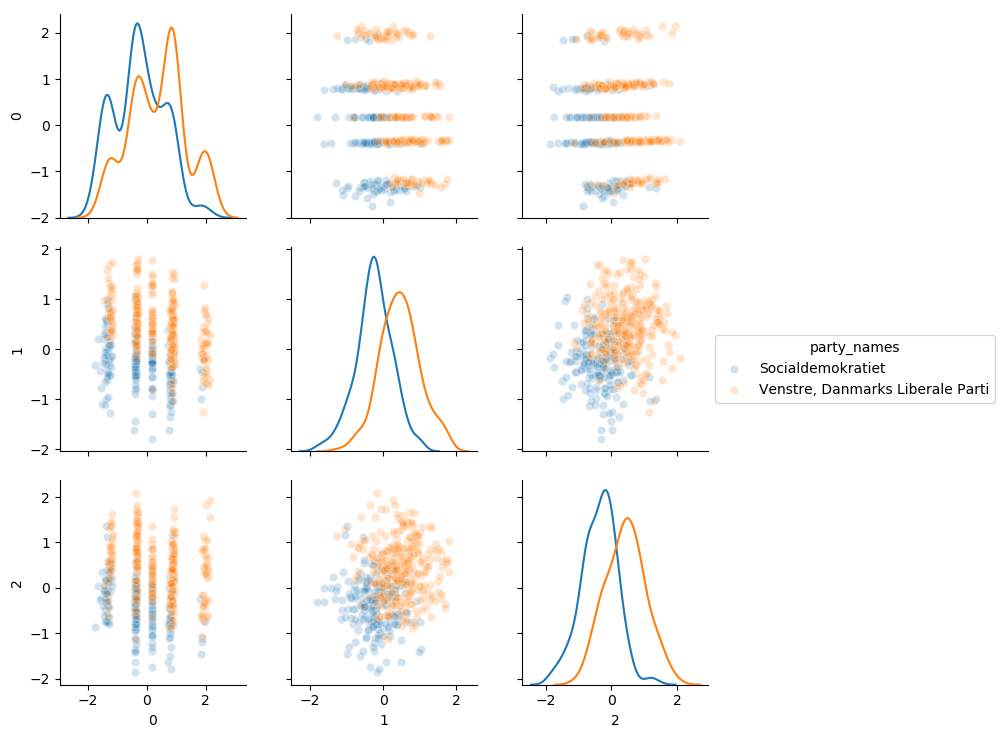

In [36]:
tmp = factors.loc[(factors['party_names'] == 'Venstre, Danmarks Liberale Parti') | (factors['party_names'] == 'Socialdemokratiet')]
scatter_v_s = sbn.pairplot(tmp, hue='party_names', diag_kind='kde', plot_kws={'alpha': 0.2})
scatter_v_s.savefig('figs_probit//probit_scatter_v_df.png')
scatter_v_s.fig

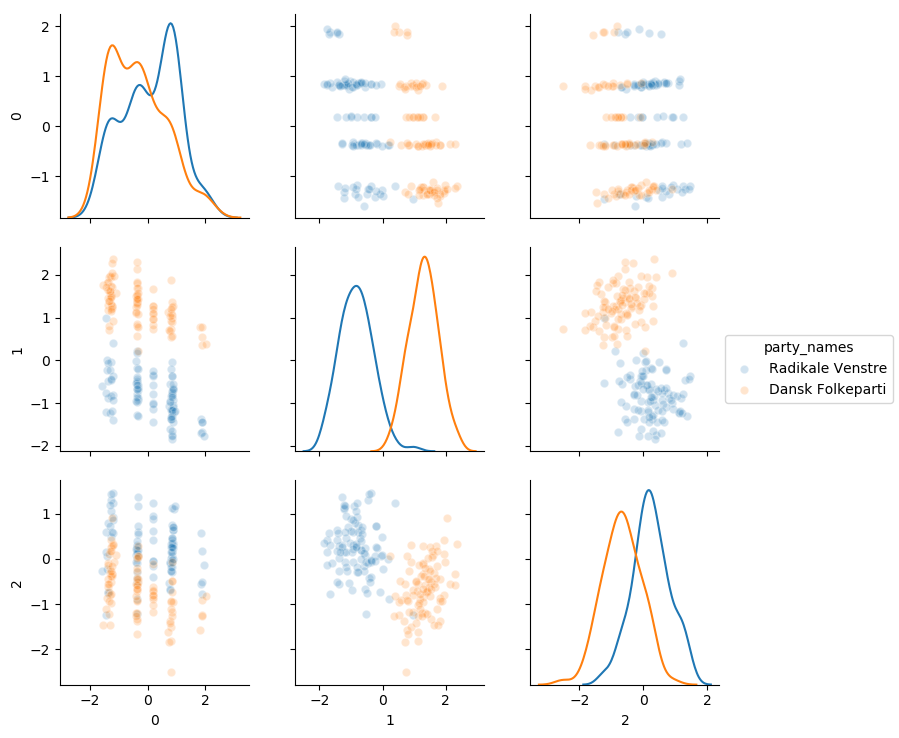

In [37]:
tmp = factors.loc[(factors['party_names'] == 'Radikale Venstre') | (factors['party_names'] == 'Dansk Folkeparti')]
scatter_rv_df = sbn.pairplot(tmp, hue='party_names', diag_kind='kde', plot_kws={'alpha': 0.2})
scatter_rv_df.savefig('figs_probit//probit_scatter_rv_df.png')
scatter_rv_df.fig

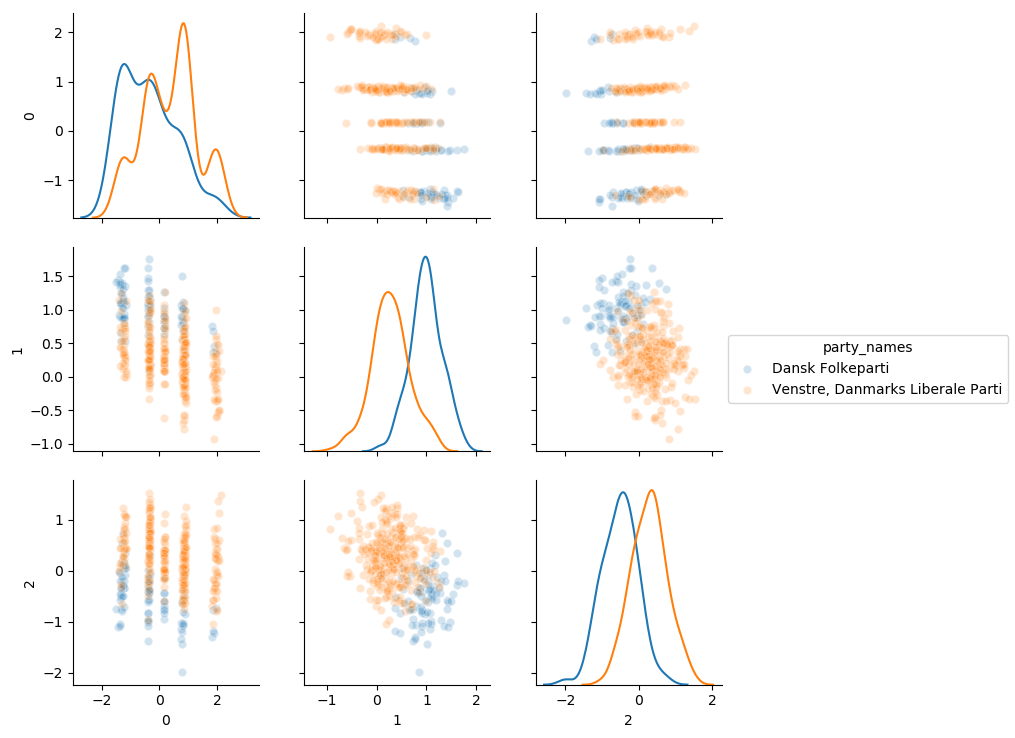

In [20]:
tmp = factors.loc[(factors['party_names'] == 'Venstre, Danmarks Liberale Parti') | (factors['party_names'] == 'Dansk Folkeparti')]
scatter_v_df = sbn.pairplot(tmp, hue='party_names', diag_kind='kde', plot_kws={'alpha': 0.2})
scatter_v_df.savefig('figs_probit//probit_scatter_v_df.png')
scatter_v_df.fig

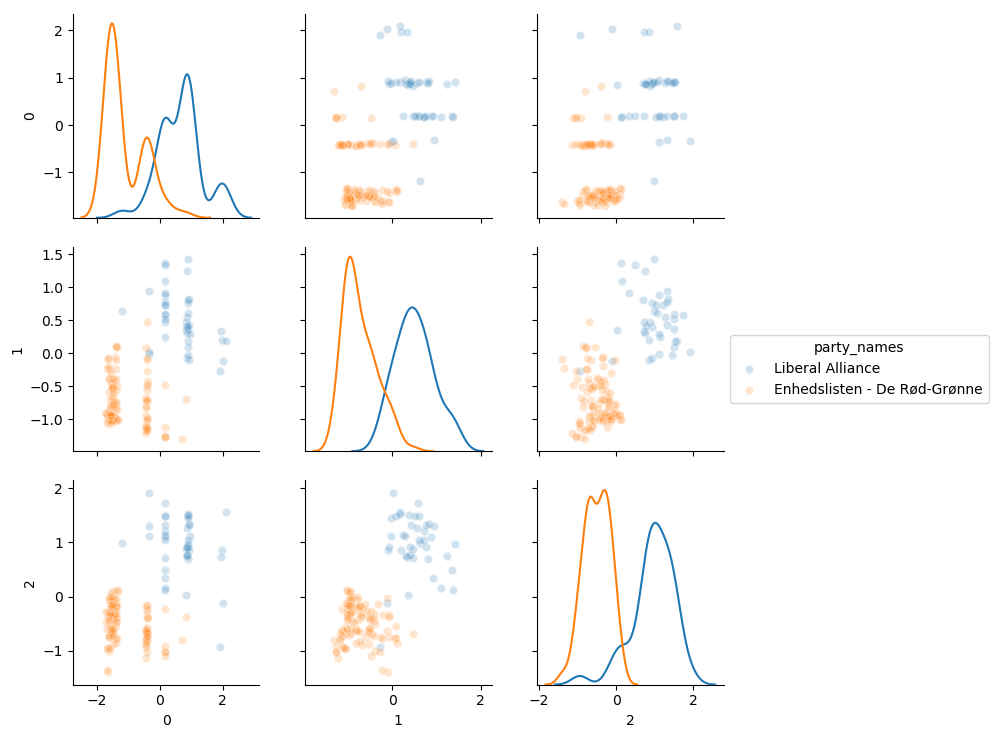

In [21]:
tmp = factors.loc[(factors['party_names'] == 'Liberal Alliance') | (factors['party_names'] == 'Enhedslisten - De Rød-Grønne')]
scatter_la_el = sbn.pairplot(tmp, hue='party_names', diag_kind='kde', plot_kws={'alpha': 0.2})
scatter_la_el.savefig('figs_probit//probit_scatter_la_el.png')
scatter_la_el.fig

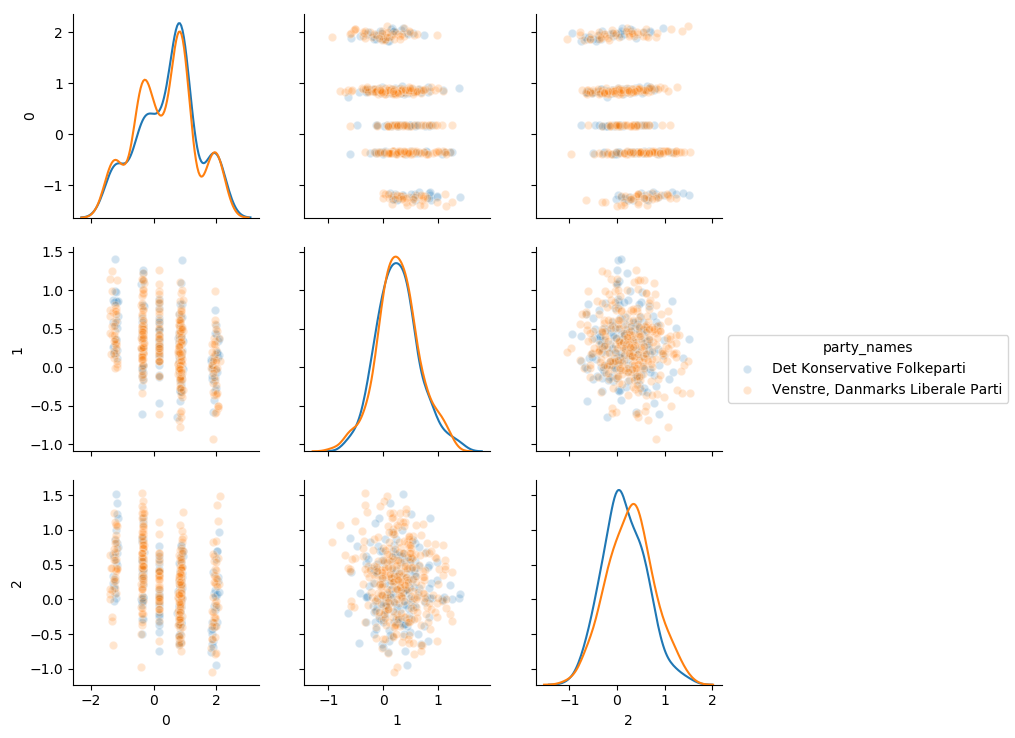

In [22]:
tmp = factors.loc[(factors['party_names'] == 'Venstre, Danmarks Liberale Parti') | (factors['party_names'] == 'Det Konservative Folkeparti')]
scatter_v_c = sbn.pairplot(tmp, hue='party_names', diag_kind='kde', plot_kws={'alpha': 0.2})
scatter_v_c('figs_probit//probit_scatter_v_c.png')
scatter_v_c.fig

In [23]:
param = Parameters(beta_trace)
param._calc_param_mean_dict(1000)
loadings = param.params_to_df()
loadings['question'] = order

In [24]:
latex_loadings = loadings.round(2)
latex_loadings.set_index('question', inplace=True)
print(latex_loadings.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &      0 &     1 &     2 \\
question &        &       &       \\
\midrule
q2       &  12.22 &  0.00 &  0.00 \\
q8       &   0.24 &  0.93 &  0.00 \\
q0       &   0.87 &  0.49 &  0.93 \\
q1       &  12.72 &  0.01 & -0.00 \\
q3       &   0.46 &  0.35 &  0.57 \\
q4       &  -0.09 & -0.21 & -0.34 \\
q5       &  -0.28 & -0.25 & -0.55 \\
q6       &  -0.23 & -0.36 & -0.29 \\
q7       &  -0.38 & -1.08 &  0.01 \\
q9       &   0.31 &  0.54 &  0.35 \\
q10      &   0.54 &  0.28 &  0.44 \\
q11      &  -0.30 & -0.43 & -0.44 \\
q12      &   0.53 &  0.58 &  0.43 \\
q13      &  -0.08 & -0.01 & -0.15 \\
q14      &  -0.51 & -0.58 & -0.54 \\
\bottomrule
\end{tabular}



In [25]:
factor_trace.to_hdf('data//factor_trace_hdf', 'w')

In [26]:
data = pd.read_hdf('data//factor_trace_hdf', mode='r')

In [38]:
data.head()

,factor_estimation_0;0,factor_estimation_0;1,factor_estimation_0;2,factor_estimation_1000;0,factor_estimation_1000;1,factor_estimation_1000;2,factor_estimation_1001;0,factor_estimation_1001;1,factor_estimation_1001;2,factor_estimation_1002;0,...,factor_estimation_998;2,factor_estimation_999;0,factor_estimation_999;1,factor_estimation_999;2,factor_estimation_99;0,factor_estimation_99;1,factor_estimation_99;2,factor_estimation_9;0,factor_estimation_9;1,factor_estimation_9;2
0,-0.104411,-0.531280,1.029733,-0.914589,0.615393,0.117024,1.016654,-0.386611,0.312849,1.546315,...,0.623397,-1.061322,0.838699,-2.674814,0.383789,1.334731,1.671791,0.007315,-0.612939,1.299748
1,-0.344166,0.424393,0.390967,-0.411673,0.330216,-0.092577,-0.057905,-0.117551,0.576976,-0.225666,...,-0.090406,-0.211835,0.486900,-0.613095,-0.225764,0.416429,0.776275,-0.522359,0.542832,0.695957
2,-0.928499,0.694255,-0.115503,-0.445865,0.453867,-0.709134,-0.840757,-0.430643,1.726288,-1.230362,...,-1.261402,0.070981,0.309465,-0.766351,-0.485511,1.223063,-1.445196,-0.710155,0.854240,-0.251649
3,-1.129418,0.520963,-0.864505,-0.271105,0.544173,-0.762253,-1.114259,0.415943,1.639739,-2.155076,...,-1.115468,0.152863,1.029483,-0.458403,-0.110280,1.199592,-0.811752,-0.305245,1.204864,-0.896648
4,-0.935370,1.023285,-0.609168,0.216390,0.905466,-0.996513,-1.519795,0.020279,1.789678,-2.215788,...,-0.880365,0.408965,1.255102,-0.465648,-0.565658,1.369615,-1.945580,-0.372406,1.120546,-0.908027


In [40]:
factor_trace

,factor_estimation_0;0,factor_estimation_0;1,factor_estimation_0;2,factor_estimation_1000;0,factor_estimation_1000;1,factor_estimation_1000;2,factor_estimation_1001;0,factor_estimation_1001;1,factor_estimation_1001;2,factor_estimation_1002;0,...,factor_estimation_998;2,factor_estimation_999;0,factor_estimation_999;1,factor_estimation_999;2,factor_estimation_99;0,factor_estimation_99;1,factor_estimation_99;2,factor_estimation_9;0,factor_estimation_9;1,factor_estimation_9;2
0,-0.104411,-0.531280,1.029733,-0.914589,0.615393,0.117024,1.016654,-0.386611,0.312849,1.546315,...,0.623397,-1.061322,0.838699,-2.674814,0.383789,1.334731,1.671791,0.007315,-0.612939,1.299748
1,-0.344166,0.424393,0.390967,-0.411673,0.330216,-0.092577,-0.057905,-0.117551,0.576976,-0.225666,...,-0.090406,-0.211835,0.486900,-0.613095,-0.225764,0.416429,0.776275,-0.522359,0.542832,0.695957
2,-0.928499,0.694255,-0.115503,-0.445865,0.453867,-0.709134,-0.840757,-0.430643,1.726288,-1.230362,...,-1.261402,0.070981,0.309465,-0.766351,-0.485511,1.223063,-1.445196,-0.710155,0.854240,-0.251649
3,-1.129418,0.520963,-0.864505,-0.271105,0.544173,-0.762253,-1.114259,0.415943,1.639739,-2.155076,...,-1.115468,0.152863,1.029483,-0.458403,-0.110280,1.199592,-0.811752,-0.305245,1.204864,-0.896648
4,-0.935370,1.023285,-0.609168,0.216390,0.905466,-0.996513,-1.519795,0.020279,1.789678,-2.215788,...,-0.880365,0.408965,1.255102,-0.465648,-0.565658,1.369615,-1.945580,-0.372406,1.120546,-0.908027
5,-1.032047,0.402990,-0.114572,-0.205705,0.539845,-0.808178,-0.861838,0.305230,1.942610,-2.971299,...,-1.502897,0.181010,1.092715,-0.898402,-0.235922,1.344296,-1.663885,-0.222314,1.100171,-0.878912
6,-1.031546,0.601011,-0.769554,-0.505206,1.151199,-1.046263,-0.996445,0.405343,1.752980,-2.599182,...,-0.798361,0.408044,1.255793,-0.835600,0.013606,1.738520,-1.205565,-0.341254,1.053050,-0.497059
7,-0.776768,0.744025,-0.248525,-0.562631,0.570574,-0.487473,-1.366594,0.082090,1.556969,-2.742665,...,-0.754140,0.861392,0.777044,-0.075183,0.079817,1.720951,-1.210772,-0.025936,0.734859,-0.611250
8,-0.601363,1.038268,-0.338920,-0.051392,1.007367,-0.494846,-0.955453,0.345353,1.818263,-2.768434,...,-1.084477,0.190521,0.857597,-0.216836,0.021132,1.208146,-1.093757,0.184287,0.726741,0.288825
9,-1.422650,0.721018,-1.723056,-0.163909,0.846896,-1.026812,-1.182468,0.561780,1.981921,-3.162065,...,-0.780618,0.938635,0.572776,0.470971,-0.012491,1.165675,-0.961635,-0.010475,1.165408,-1.074441
